# A novel multi-model, data first, chrome extension and WhatsApp based approach to fake news.

In [1]:
from google.colab import drive
drive.mount("/content/drive")

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
!curl -s https://packagecloud.io/install/repositories/github/git-lfs/script.deb.sh | sudo bash



Detected operating system as Ubuntu/bionic.
Checking for curl...
Detected curl...
Checking for gpg...
Detected gpg...
Running apt-get update... done.
Installing apt-transport-https... done.
Installing /etc/apt/sources.list.d/github_git-lfs.list...done.
Importing packagecloud gpg key... done.
Running apt-get update... done.

The repository is setup! You can now install packages.


In [0]:
!sudo apt-get install git-lfs

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following package was automatically installed and is no longer required:
  libnvidia-common-430
Use 'sudo apt autoremove' to remove it.
The following NEW packages will be installed:
  git-lfs
0 upgraded, 1 newly installed, 0 to remove and 65 not upgraded.
Need to get 6,096 kB of archives.
After this operation, 14.8 MB of additional disk space will be used.
Get:1 https://packagecloud.io/github/git-lfs/ubuntu bionic/main amd64 git-lfs amd64 2.9.2 [6,096 kB]
Fetched 6,096 kB in 1s (7,577 kB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 76, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype


In [7]:
%cd drive/My Drive/DL/FND/Fake-News

[Errno 2] No such file or directory: 'drive/My Drive/DL/FND/Fake-News'
/content/drive/My Drive/DL/fnc-msc


In [0]:
from fastai.text import *
from fastai import *


## Preparing the Data

In [0]:
path = Path("../Fake-News")

In [0]:
path.ls()

[PosixPath('../Fake-News/Fake+News -1.ipynb'),
 PosixPath('../Fake-News/fake_or_real_news.csv'),
 PosixPath('../Fake-News/__MACOSX'),
 PosixPath('../Fake-News/.git'),
 PosixPath('../Fake-News/LICENSE'),
 PosixPath('../Fake-News/README.md'),
 PosixPath('../Fake-News/Status-Work in Progress-success.svg'),
 PosixPath('../Fake-News/fake_or_real_news.csv.zip'),
 PosixPath('../Fake-News/models'),
 PosixPath('../Fake-News/data-c')]

Reading the data with the pandas library, we can see the format of the data. It's a .csv file with a Title, text and a label:- <b>Real</b> or <b>Fake</b>

In [0]:
df = pd.read_csv(path/'fake_or_real_news.csv')
df.head()

,Unnamed: 0,title,text,label
0,8476,You Can Smell Hillary’s Fear,"Daniel Greenfield, a Shillman Journalism Fello...",FAKE
1,10294,Watch The Exact Moment Paul Ryan Committed Pol...,Google Pinterest Digg Linkedin Reddit Stumbleu...,FAKE
2,3608,Kerry to go to Paris in gesture of sympathy,U.S. Secretary of State John F. Kerry said Mon...,REAL
3,10142,Bernie supporters on Twitter erupt in anger ag...,"— Kaydee King (@KaydeeKing) November 9, 2016 T...",FAKE
4,875,The Battle of New York: Why This Primary Matters,It's primary day in New York and front-runners...,REAL

















Using a pandas dataframe, we can index into any particluar text (in this case 100). We can index into different text pieces to 
get a sense of the data. Using the title 'text' we can read the contents of the article. To get the title ot label  of it, replace text with name of the column you would like to see




In [0]:
df['text'][100]

"In 2008, in the high-profile Supreme Court gun-rights case called District of Columbia v. Heller, a brief was filed from the eighth floor of the Price Daniel Sr. State Office Building in Austin, Texas, specifically from the corner office of the man who was then the state’s solicitor general, Ted Cruz.\n\nThe brief took a strong stance on the divisive question of whether the Second Amendment establishes an individual right to own guns, or just protects state and local militias. The brief argued forcefully for the first view, writing that “the individual right to keep and bear arms” is a “fundamental right” and that “an individual right that can be altogether abrogated is no right at all.” Thirty attorneys general from other states signed on.\n\nToday, with the White House pushing new gun restrictions and Cruz's candidacy riding on next month's Iowa caucuses, it's no surprise that the Texas Republican would embrace gun rights as a defining issue, holding an event at a firing range and e

In [0]:
df['title'][190]


'Prison employee pleaded not guilty to aiding escape of two murderers'

In [0]:
bs = 32


## Tokenization
The first step of processing we make the texts go through is to split the raw sentences into words, or more exactly tokens. The easiest way to do this would be to split the string on spaces, but we can be smarter:

We need to take care of punctuation
  - some words are contractions of two different words, like isn't or don't
  - we may need to clean some parts of our texts, if there's HTML code for instance
  - To see what the tokenizer had done behind the scenes, let's have a look at a few texts in a batch.

As we can see below, all the words have been tokenized. For example, in <b>idx</b> 1, hillary's has been separated into two
separate tokens - hilary + 's 
Some words have an 'xx' attached to this. These denoteseparate parts of a document. For example

   - xxcap : All Capital Letters
   - xxunk : Rarely occuring words
   - xxfld :  Beginning of a new field


In [0]:
data_language  = (TextList.from_df(df, cols = ['text', 'label']) 
                  .random_split_by_pct(0.2)
                  .label_for_lm()
                  .databunch(bs = bs))

/usr/local/lib/python3.6/dist-packages/fastai/data_block.py:215: UserWarning: `random_split_by_pct` is deprecated, please use `split_by_rand_pct`.
  warn("`random_split_by_pct` is deprecated, please use `split_by_rand_pct`.")


In [0]:
data_language.show_batch(df.count()[1])


idx,text
0,often this election that it ought to be retired . xxmaj but it ’s still unprecedented for the nominee of a major political party to go war with the xxup fbi . \n xxmaj but that ’s exactly what xxmaj hillary and her people have done . xxmaj coma patients just waking up now and watching an hour of xxup cnn from their hospital beds would assume that xxup
1,"only those in xxmaj xxunk ? xxmaj for me it should include xxup et - angelic component . xxmaj time will tell . xxmaj time that runs out , according to xxmaj xxunk and other xxunk of xxmaj virgin xxmaj mary . xxmaj that does n't mean it has all to happen on xxmaj december 1st . xxmaj every next week draws us closer to the two doors , one"
2,"about “ conscientious objection ” as a human right , even for government officials . \n \n xxmaj in some ways , the meeting fit with the pope ’s focus on the “ spirit of encounter ” as well as his unorthodox meetings with people he calls on the “ xxunk . ” xxmaj and it also came days after he met with nuns fighting an xxmaj obamacare mandate"
3,"for his political activity , and that they timed the transfer to prevent him from meeting with this lawyer . \n xxmaj kinetik is an outspoken advocate for the human rights of the incarcerated . xxmaj along with xxmaj xxunk xxmaj khalid and xxmaj bennu xxmaj hannibal xxmaj ra - xxmaj sun , xxmaj kinetik and the xxmaj free xxmaj alabama xxmaj movement were some of the people behind"
4,"by xxup xxunk , the armed standoff began xxmaj jan. 2 and lasted nearly six weeks . xxmaj the incident brought new attention to the long - running issue of too much federal ownership of lands in the xxmaj american xxmaj west . xxmaj the confrontations at the refuge earlier this year and on xxmaj cliven xxmaj bundy 's ranch in 2014 essentially reignited arguments between private citizens – mostly"
5,"had repeatedly ignored the deadlines to produce records and answers to questions , known as xxunk … xxunk , under subpoena , xxmaj trump appeared for a short deposition . xxmaj when asked about the missing documents , he made a shocking admission : xxmaj the xxmaj trumps had been destroying their corporate records for the previous six months and had no document - retention program . xxmaj they had"
6,"justifying ” even harsher counter measures by xxmaj america and its xxmaj european allies against xxmaj moscow . \n xxmaj secondly , a digital attack on xxmaj america ’s presidential election day this week , would allow the xxmaj washington establishment to pronounce a xxmaj trump win invalid due to “ xxmaj russian cyber subversion ” . xxmaj xxunk is a prepared option if the ballot results show xxmaj"
7,"zionists ’ role in drafting the xxmaj mandate , it included the terms of the xxmaj balfour xxmaj declaration , charging the xxmaj british with enacting policies to “ secure the establishment of the xxmaj jewish national xxunk the facilitation of xxmaj jewish immigration — and requiring the xxmaj british administration to consult and cooperate with the xxmaj jewish xxmaj agency toward that end . \n xxmaj it contained"
8,"what exactly does that mean ? \n — xxmaj jake xxmaj tapper ( @jaketapper ) xxmaj october 26 , 2016 \n xxmaj good question . xxmaj there ’s no need to alert the authorities , as plenty of people have already ; it ’ll be up to the powers that be to determine if “ grabbing my musket ” constitutes a threat , or if it ’s meant"
9,"gross , president of the xxmaj brady xxmaj campaign and xxmaj center to xxmaj prevent xxmaj gun xxmaj violence , said in a statement : “ [ xxmaj xxunk day , 88 lives are lost in shootings across our nation . xxmaj most of these tragedies are preventable through sensible solutions that just keep guns out of the wrong hands : solutions like expanding xxmaj brady background"


In [0]:
df.count()


Unnamed: 0    6335
title         6335
text          6335
label         6335
dtype: int64

As we can see the data has <b>6335</b> items i.e. unique articles/excrepts

# Modelling


### Language Model
We have now prepared our data and have created a DataBunch out of it. Now, we can start building models for actual predictions!

Before building the actual classifier, we have to build a model that understand English. For that we will be using the WikiText dataset. The reason is that a model finds it very difficult to learn both English and recognising Fake News in one go!

We have set the batch size to 32. If your GPU cannot handle it, just decrease it to 16 or 8. A language_model_learner will be creating a Recurrent Neural Network. 


In [0]:
bs = 32

In [0]:
config = awd_lstm_lm_config.copy()
config['n_hid'] = 33056

In [0]:
learn = language_model_learner(data_language, arch = AWD_LSTM , pretrained = True, drop_mult=0.3)

In fast.ai ``` learn.lr_find()```, helps us find to the optimal learning rate. Once it is complete, run ```learn.recorder.plot()``` to plot the <b>loss</b> v/s <b>different learning rates.</b> Looking at the plot, we have to pick a learning rate just before the plot rises, here it is 1e-02.

In [0]:
learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


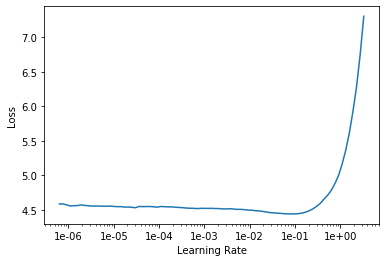

In [0]:
learn.recorder.plot()

In [0]:
learn.fit_one_cycle(4, 1e-03,moms=(0.8,0.7))

epoch,train_loss,valid_loss,accuracy,time
0,3.949067,3.821654,0.318966,03:59
1,3.816660,3.745053,0.326263,03:58
2,3.766992,3.724754,0.329093,03:58
3,3.658822,3.722051,0.329558,03:58


Use ```learn.save()```, to save the weights of the model we trained just now. Load it back up by using ```learn.load()```.

In [0]:
learn.save('model-6J')

In [0]:
learn.load('model-6J')

LanguageLearner(data=TextLMDataBunch;

Train: LabelList (5068 items)
x: LMTextList
xxbos xxmaj daniel xxmaj greenfield , a xxmaj shillman xxmaj journalism xxmaj fellow at the xxmaj freedom xxmaj center , is a xxmaj new xxmaj york writer focusing on radical xxmaj islam . 
  xxmaj in the final stretch of the election , xxmaj hillary xxmaj rodham xxmaj clinton has gone to war with the xxup fbi . 
  xxmaj the word “ unprecedented ” has been thrown around so often this election that it ought to be retired . xxmaj but it ’s still unprecedented for the nominee of a major political party to go war with the xxup fbi . 
  xxmaj but that ’s exactly what xxmaj hillary and her people have done . xxmaj coma patients just waking up now and watching an hour of xxup cnn from their hospital beds would assume that xxup fbi xxmaj director xxmaj james xxmaj comey is xxmaj hillary ’s opponent in this election . 
  xxmaj the xxup fbi is under attack by everyone from xxmaj obama to xxup cnn . xxmaj hillary ’s

Use ```learn.unfreeze()```to unfeeze earlier layers. Read more about this [here](https://forums.fast.ai/t/can-someone-explain-precompute-true-and-freeze-or-unfreeze/18169/2)

In [0]:
learn.unfreeze()

In [0]:
learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


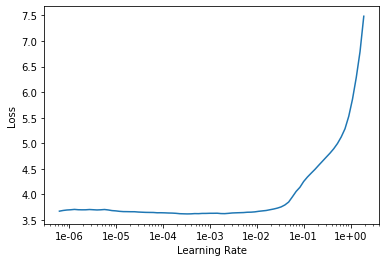

In [0]:
learn.recorder.plot()

In [0]:
learn.fit_one_cycle(4, 1e-3, moms = (0.8,0.7))

epoch,train_loss,valid_loss,accuracy,time
0,3.653933,3.668294,0.339434,04:44
1,3.581274,3.597492,0.350769,04:47
2,3.289354,3.532580,0.360833,04:43
3,3.106197,3.533060,0.362161,04:44


In [0]:
learn.save('enc-6J')

In [0]:
learn.load('enc-6J')

LanguageLearner(data=TextLMDataBunch;

Train: LabelList (5068 items)
x: LMTextList
xxbos xxmaj daniel xxmaj greenfield , a xxmaj shillman xxmaj journalism xxmaj fellow at the xxmaj freedom xxmaj center , is a xxmaj new xxmaj york writer focusing on radical xxmaj islam . 
  xxmaj in the final stretch of the election , xxmaj hillary xxmaj rodham xxmaj clinton has gone to war with the xxup fbi . 
  xxmaj the word “ unprecedented ” has been thrown around so often this election that it ought to be retired . xxmaj but it ’s still unprecedented for the nominee of a major political party to go war with the xxup fbi . 
  xxmaj but that ’s exactly what xxmaj hillary and her people have done . xxmaj coma patients just waking up now and watching an hour of xxup cnn from their hospital beds would assume that xxup fbi xxmaj director xxmaj james xxmaj comey is xxmaj hillary ’s opponent in this election . 
  xxmaj the xxup fbi is under attack by everyone from xxmaj obama to xxup cnn . xxmaj hillary ’s

After trainig the language model, we can ask it to predict the next words by giving it a couple of words in the beginning. Here, we give the words 'Trump's daughter' and ask it to predict the next 100 words. Results are hilarious:-)

In [0]:
learn.predict("Trump's daughter:", 100, temperature=0.5 ,min_p =0.001)

"Trump's daughter: Her daughter Melania Trump , who was born in Indiana , said she was born in Indiana to Trump Jr. . The Republican nominee was born in Indiana and is a Muslim . Trump is a Republican , but his father was a British native and his father was a Muslim . Trump is known as a Muslim and is known for his religious beliefs . His father , Stephen Trump , was a Muslim . He was"

Now we can save the language model as an encoder

In [0]:
learn.save_encoder('enc1-6J')

In [0]:
learn.load_encoder('enc1-6J')

LanguageLearner(data=TextLMDataBunch;

Train: LabelList (5068 items)
x: LMTextList
xxbos xxmaj daniel xxmaj greenfield , a xxmaj shillman xxmaj journalism xxmaj fellow at the xxmaj freedom xxmaj center , is a xxmaj new xxmaj york writer focusing on radical xxmaj islam . 
  xxmaj in the final stretch of the election , xxmaj hillary xxmaj rodham xxmaj clinton has gone to war with the xxup fbi . 
  xxmaj the word “ unprecedented ” has been thrown around so often this election that it ought to be retired . xxmaj but it ’s still unprecedented for the nominee of a major political party to go war with the xxup fbi . 
  xxmaj but that ’s exactly what xxmaj hillary and her people have done . xxmaj coma patients just waking up now and watching an hour of xxup cnn from their hospital beds would assume that xxup fbi xxmaj director xxmaj james xxmaj comey is xxmaj hillary ’s opponent in this election . 
  xxmaj the xxup fbi is under attack by everyone from xxmaj obama to xxup cnn . xxmaj hillary ’s

## Classifier

Now that we have built the language_model, we can go head and start with the Classifier. The Classifier is quite similar to the language_model. Following the same steps as before, will be fine



In [0]:
bs = 24

In [0]:
data_b = (TextList.from_df(df, cols='text', vocab=data_language.vocab)
            .random_split_by_pct(valid_pct=0.2)
            .label_from_df(cols='label')
            .databunch(bs=bs))

/usr/local/lib/python3.6/dist-packages/fastai/data_block.py:215: UserWarning: `random_split_by_pct` is deprecated, please use `split_by_rand_pct`.
  warn("`random_split_by_pct` is deprecated, please use `split_by_rand_pct`.")


In [0]:
data_cc.save('data-cc')

In [0]:
path = Path("../Fake-News")

In [0]:
path.ls()

[PosixPath('../Fake-News/Fake+News -1.ipynb'),
 PosixPath('../Fake-News/fake_or_real_news.csv'),
 PosixPath('../Fake-News/__MACOSX'),
 PosixPath('../Fake-News/.git'),
 PosixPath('../Fake-News/LICENSE'),
 PosixPath('../Fake-News/README.md'),
 PosixPath('../Fake-News/Status-Work in Progress-success.svg'),
 PosixPath('../Fake-News/fake_or_real_news.csv.zip'),
 PosixPath('../Fake-News/models'),
 PosixPath('../Fake-News/data-c')]

In [0]:
df = pd.read_csv(path/'fake_or_real_news.csv', usecols=["label", "text"])[["label", "text"]]

In [0]:
df.head()[:20]

,label,text
0,FAKE,"Daniel Greenfield, a Shillman Journalism Fello..."
1,FAKE,Google Pinterest Digg Linkedin Reddit Stumbleu...
2,REAL,U.S. Secretary of State John F. Kerry said Mon...
3,FAKE,"— Kaydee King (@KaydeeKing) November 9, 2016 T..."
4,REAL,It's primary day in New York and front-runners...


In [0]:
path2 = path/'data-cc.pkl'

In [0]:
# data_c =  TextClasDataBunch.load(path, 'data-cc',bs=bs)
data_c = load_data(path2, ,bs=bs)


FileNotFoundError: ignored

Finally, we can create the actual classifier using the ```text_classifier``` in fast.ai

In [0]:
doc(text_classifier_learner)

In [0]:
learn_classify = text_classifier_learner(data_b, arch = AWD_LSTM,drop_mult = 0.45)

In [0]:
learn_classify.load_encoder('enc1-6J')

RNNLearner(data=TextClasDataBunch;

Train: LabelList (5068 items)
x: TextList
xxbos xxmaj daniel xxmaj greenfield , a xxmaj shillman xxmaj journalism xxmaj fellow at the xxmaj freedom xxmaj center , is a xxmaj new xxmaj york writer focusing on radical xxmaj islam . 
  xxmaj in the final stretch of the election , xxmaj hillary xxmaj rodham xxmaj clinton has gone to war with the xxup fbi . 
  xxmaj the word “ unprecedented ” has been thrown around so often this election that it ought to be retired . xxmaj but it ’s still unprecedented for the nominee of a major political party to go war with the xxup fbi . 
  xxmaj but that ’s exactly what xxmaj hillary and her people have done . xxmaj coma patients just waking up now and watching an hour of xxup cnn from their hospital beds would assume that xxup fbi xxmaj director xxmaj james xxmaj comey is xxmaj hillary ’s opponent in this election . 
  xxmaj the xxup fbi is under attack by everyone from xxmaj obama to xxup cnn . xxmaj hillary ’s peop

In [0]:
learn_classify.freeze()

In [0]:
learn_classify.lr_find()

NameError: ignored

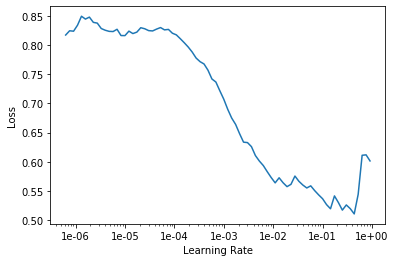

In [0]:
learn_classify.recorder.plot()

In [0]:
learn_classify.fit_one_cycle(1, 1e-3, moms = (0.8, 0.7))

epoch,train_loss,valid_loss,accuracy,time
0,0.211046,0.067538,0.987372,02:32


In [0]:

learn_classify.freeze_to(-2)
learn_classify.fit_one_cycle(1, slice(1e-3/(2.6**4),1e-2), moms=(0.8,0.7))

epoch,train_loss,valid_loss,accuracy,time
0,0.217953,0.041085,0.993686,02:42


In [0]:
 learn_classify.save('final-6J')

In [0]:
learn_classify.load('penultimate')

In [0]:
learn_classify.load('penultimate')

In [0]:
learn_classify.export('final-6Ji.pkl')


<b>Finally, we have completed the classifier. Let's test it!</b>


Example 1: (FAKE)

In [0]:
learn_classify.predict("Hung Assembly in India. Modi defeated by Rahul Gandhi ans other UPA parties. BSP, SP and other parties have joined Congress. The people of India have given Modi a reality check, as a consequence of his miseading, damaging  and dishonest policies. Rahul Gandhi will take oath in 2 days!Other party leaders are slated to get lucrative ministries ")

(Category FAKE, tensor(0), tensor([0.9909, 0.0091]))

Example 2: (REAL)

In [0]:
learn_classify.predict(" Eight months after the BJP named him its prime ministerial candidate, Narendra Modi, 63, proved he was worth the opposition the party originally encountered over its decision. Mr Modi has delivered the BJP's best result ever, giving it more than the 272 seats it needs to form a government.  This is the first parliamentary majority by a single party since 1984")

(Category FAKE, tensor(0), tensor([0.6813, 0.3187]))

As we see, the first short excrept was written by me and the second one was a <b>real</b> article from a newpaper and the model correctly classified it!

# Conclusion

### Takeaways
The model classifies Fake/Real by understanding the linguistic structure of the sentences. 

- In our example the first example was written by me in a very rudimentary and non-formal way, like most Fake News. 
- The second one, a proper news article, is a more professional and well-written article, like most of the Real News.

### Limitations 
As this model relies on the linguistic structure of a sentence, it is <b>by far</b> not a full proof Fake News Classifer.

- As it relies on the structure of a sentence, a well-written <b> Fake</b> article will be not be flagged down.
- Conversely, a poorly written <b> Real</b> article may be flagged down

These limitations can be undone, and am currently working on it!

References:
[The Excellent Fast.ai Course](https://github.com/fastai)


In [8]:
!pwd

/content/drive/My Drive/DL/fnc-msc


In [12]:
%cd ../fnc-msc

/content/drive/My Drive/DL/fnc-msc


In [10]:
learn_classify = load_learner(Path('Fake-News'), 'final-6Ji.pkl')


In [0]:
# learn_classify

In [13]:
# -*- coding: UTF-8 -*-

# imports #
from eventregistry import *
from numpy.random import seed
seed(0)
import numpy as np
import pickle
import keras
from keras.models import Model, load_model
from keras.layers import Masking, Dense, concatenate, multiply, subtract, Dropout, Embedding, LSTM, GRU, Bidirectional, GlobalMaxPooling1D, Input, TimeDistributed
from keras.optimizers import Adam

from my_layers import SelfAttLayer, weightedAccCallback
from score import score_submission, print_confusion_matrix, report_score

abbr_list = ["n't","'d","'ll","'s","'m","'ve","'re"]


def closest_word(originalWord, embeddings):
    words = list(embeddings.keys())
    currentClosest = words[0]
    for word in words:
        if jellyfish.jaro_winkler(originalWord, word) > jellyfish.jaro_winkler(originalWord, currentClosest):
            currentClosest = word
    print("Closest word to " + originalWord +" is " + currentClosest)
    return embeddings[currentClosest]

def remove_parenthesis(sent):
    return ' '.join(sent.replace('(', ' ').replace(')', ' ').replace('.', '').split()).lower()

def clean(s):
    # Cleans a string: Lowercasing, trimming, removing non-alphanumeric
    return " ".join(re.findall(r'\w+', s, flags=re.UNICODE)).lower()
def clean_fnc(s):
    s = unidecode.unidecode(s) # for correct tokenization
    tokens = word_tokenize(s)
    for i, tok in enumerate(tokens):
        if tok not in abbr_list:
            tokens[i] = clean(tok)
    return ' '.join(list(filter(lambda x: x != '', tokens))).lower()


#/usr/bin/env python
# -*- coding: UTF-8 -*-

# imports #
from numpy.random import seed
seed(0)
from keras.callbacks import ModelCheckpoint, EarlyStopping

import numpy as np
import pickle
import keras
from keras.models import Model, load_model
from keras.layers import Masking, Dense, concatenate, multiply, subtract, Dropout, Embedding, LSTM, GRU, Bidirectional, GlobalMaxPooling1D, Input, TimeDistributed
from keras.optimizers import Adam

from my_layers import SelfAttLayer, weightedAccCallback
from score import score_submission, print_confusion_matrix, report_score

# Some hyperparameters #
hidden_units = 300
max_seq_len = 50
max_seqs = 30
########################

print("Opening features")
with open('Data_Fake/features.pkl', 'rb') as inpFeat:
    overlapFeatures_fnc = pickle.load(inpFeat)
    refutingFeatures_fnc = pickle.load(inpFeat)
    polarityFeatures_fnc = pickle.load(inpFeat)
    handFeatures_fnc = pickle.load(inpFeat)
    overlapFeatures_fnc_test = pickle.load(inpFeat)
    refutingFeatures_fnc_test = pickle.load(inpFeat)
    polarityFeatures_fnc_test = pickle.load(inpFeat)
    handFeatures_fnc_test = pickle.load(inpFeat)
    overlapFeatures_nli = pickle.load(inpFeat)
    refutingFeatures_nli = pickle.load(inpFeat)
    polarityFeatures_nli = pickle.load(inpFeat)
    handFeatures_nli = pickle.load(inpFeat)
    overlapFeatures_nli_test = pickle.load(inpFeat)
    refutingFeatures_nli_test = pickle.load(inpFeat)
    polarityFeatures_nli_test = pickle.load(inpFeat)
    handFeatures_nli_test = pickle.load(inpFeat)
    overlapFeatures_matched_test = pickle.load(inpFeat)
    refutingFeatures_matched_test = pickle.load(inpFeat)
    polarityFeatures_matched_test = pickle.load(inpFeat)
    handFeatures_matched_test = pickle.load(inpFeat)
    overlapFeatures_mismatched_test = pickle.load(inpFeat)
    refutingFeatures_mismatched_test = pickle.load(inpFeat)
    polarityFeatures_mismatched_test = pickle.load(inpFeat)
    handFeatures_mismatched_test = pickle.load(inpFeat)
    overlapFeatures_fnc_two = pickle.load(inpFeat)
    refutingFeatures_fnc_two = pickle.load(inpFeat)
    polarityFeatures_fnc_two = pickle.load(inpFeat)
    handFeatures_fnc_two = pickle.load(inpFeat)
    overlapFeatures_fnc_two_test = pickle.load(inpFeat)
    refutingFeatures_fnc_two_test = pickle.load(inpFeat)
    polarityFeatures_fnc_two_test = pickle.load(inpFeat)
    handFeatures_fnc_two_test = pickle.load(inpFeat)
    bleu_nli = pickle.load(inpFeat)
    bleu_nli_test = pickle.load(inpFeat)
    bleu_matched = pickle.load(inpFeat)
    bleu_mismatched = pickle.load(inpFeat)
    rouge_nli = pickle.load(inpFeat)
    rouge_nli_test = pickle.load(inpFeat)
    rouge_matched = pickle.load(inpFeat)
    rouge_mismatched = pickle.load(inpFeat)
    bleu_fnc = pickle.load(inpFeat)
    bleu_fnc_test = pickle.load(inpFeat)
    bleu_two_sentences = pickle.load(inpFeat)
    bleu_two_sentences_test = pickle.load(inpFeat)
    rouge_fnc = pickle.load(inpFeat)
    rouge_fnc_test = pickle.load(inpFeat)
    rouge_two_sentences = pickle.load(inpFeat)
    rouge_two_sentences_test = pickle.load(inpFeat)

del overlapFeatures_nli, refutingFeatures_nli, polarityFeatures_nli, handFeatures_nli, overlapFeatures_nli_test , refutingFeatures_nli_test, \
    polarityFeatures_nli_test, handFeatures_nli_test, overlapFeatures_matched_test, refutingFeatures_matched_test, polarityFeatures_matched_test, \
    handFeatures_matched_test, overlapFeatures_mismatched_test, refutingFeatures_mismatched_test, polarityFeatures_mismatched_test, \
    handFeatures_mismatched_test, bleu_nli, bleu_nli_test, bleu_matched, bleu_mismatched, rouge_nli, rouge_nli_test, rouge_matched, rouge_mismatched

print("Opening variables")
with open('Data_Fake/variables.pkl', 'rb') as inp:
    embedding_weights = pickle.load(inp)
    X1 = pickle.load(inp)
    X2 = pickle.load(inp)
    Y = pickle.load(inp)
    X1_test = pickle.load(inp)
    X2_test = pickle.load(inp)
    Y_test = pickle.load(inp)
    X1_nli = pickle.load(inp)
    X2_nli = pickle.load(inp)
    Y_nli = pickle.load(inp)
    X1_test_nli = pickle.load(inp)
    X2_test_nli = pickle.load(inp)
    Y_test_nli = pickle.load(inp)
    X1_test_matched = pickle.load(inp)
    X2_test_matched = pickle.load(inp)
    Y_test_matched = pickle.load(inp)
    X1_test_mismatched = pickle.load(inp)
    X2_test_mismatched = pickle.load(inp)
    Y_test_mismatched = pickle.load(inp)
    X2_two_sentences = pickle.load(inp)
    X2_test_two_sentences = pickle.load(inp)
    tokenizer = pickle.load(inp)

    
del X1_nli, X2_nli, Y_nli, X1_test_nli, X2_test_nli, Y_test_nli, X1_test_matched, X2_test_matched, Y_test_matched, X1_test_mismatched, \
    X2_test_mismatched, Y_test_mismatched

print("Opening similarities")
with open('Data_Fake/similarity.pkl', 'rb') as inpSim:
    cosFeatures = pickle.load(inpSim)
    cosFeatures_test = pickle.load(inpSim)
    cosFeatures_nli = pickle.load(inpSim)
    cosFeatures_nli_test = pickle.load(inpSim)
    cosFeatures_matched = pickle.load(inpSim)
    cosFeatures_mismatched = pickle.load(inpSim)

cosFeatures = np.array(cosFeatures)
cosFeatures_test = np.array(cosFeatures_test)

cosFeatures_fnc = []
cosFeatures_two = []
for feat in cosFeatures:
    cosFeatures_fnc += [feat[0]]
    cosFeatures_two += [feat[1]]
cosFeatures_fnc = np.array(cosFeatures_fnc)
cosFeatures_two = np.array(cosFeatures_two)

cosFeatures_fnc_test = []
cosFeatures_two_test = []
for feat in cosFeatures_test:
    cosFeatures_fnc_test += [feat[0]]
    cosFeatures_two_test += [feat[1]]
cosFeatures_fnc_test = np.array(cosFeatures_fnc_test)
cosFeatures_two_test = np.array(cosFeatures_two_test)

del cosFeatures_nli, cosFeatures_nli_test, cosFeatures_matched, cosFeatures_mismatched

with open("Data_Fake/cider_fnc.pkl", "rb") as ciderFile:
    cider_fnc_train = pickle.load(ciderFile, encoding='latin1')
    cider_fnc_test = pickle.load(ciderFile, encoding='latin1')
    cider_two_train = pickle.load(ciderFile, encoding='latin1')
    cider_two_test = pickle.load(ciderFile, encoding='latin1')

import pickle as cPickle

with open("talos-fnc-1-py3/tree_model/train.basic.pkl", "rb") as countsTrain:
    names = cPickle.load(countsTrain)
    talos_counts_train = cPickle.load(countsTrain, encoding='latin1')
print('Done')
with open("talos-fnc-1-py3/tree_model/test.basic.pkl", "rb") as countsTest:
    names = cPickle.load(countsTest)
    talos_counts_test = cPickle.load(countsTest, encoding='latin1')

with open("talos-fnc-1-py3/tree_model/train.sim.tfidf.pkl", "rb") as tfidfSim_train:
    talos_tfidfsim_train = cPickle.load(tfidfSim_train, encoding='latin1')

with open("talos-fnc-1-py3/tree_model/test.sim.tfidf.pkl", "rb") as tfidfSim_test:
    talos_tfidfsim_test = cPickle.load(tfidfSim_test, encoding='latin1')

with open("talos-fnc-1-py3/tree_model/train.headline.svd.pkl", "rb") as svdHealine_train:
    talos_svdHeadline_train = cPickle.load(svdHealine_train, encoding='latin1')

with open("talos-fnc-1-py3/tree_model/test.headline.svd.pkl", "rb") as svdHealine_test:
    talos_svdHeadline_test = cPickle.load(svdHealine_test, encoding='latin1')

with open("talos-fnc-1-py3/tree_model/train.body.svd.pkl", "rb") as svdBody_train:
    talos_svdBody_train = cPickle.load(svdBody_train, encoding='latin1')

with open("talos-fnc-1-py3/tree_model/test.body.svd.pkl", "rb") as svdBody_test:
    talos_svdBody_test = cPickle.load(svdBody_test, encoding='latin1')

with open("talos-fnc-1-py3/tree_model/train.sim.svd.pkl", "rb") as svdSim_train:
    talos_svdsim_train = cPickle.load(svdSim_train, encoding='latin1')

with open("talos-fnc-1-py3/tree_model/test.sim.svd.pkl", "rb") as svdSim_test:
    talos_svdsim_test = cPickle.load(svdSim_test, encoding='latin1')

with open("talos-fnc-1-py3/tree_model/train.headline.word2vec.pkl", "rb") as w2vHealine_train:
    talos_w2vHeadline_train = cPickle.load(w2vHealine_train, encoding='latin1')

with open("talos-fnc-1-py3/tree_model/test.headline.word2vec.pkl", "rb") as w2vHealine_test:
    talos_w2vHeadline_test = cPickle.load(w2vHealine_test, encoding='latin1')

with open("talos-fnc-1-py3/tree_model/train.body.word2vec.pkl", "rb") as w2vBody_train:
    talos_w2vBody_train = cPickle.load(w2vBody_train, encoding='latin1')

with open("talos-fnc-1-py3/tree_model/test.body.word2vec.pkl", "rb") as w2vBody_test:
    talos_w2vBody_test = cPickle.load(w2vBody_test, encoding='latin1')

with open("talos-fnc-1-py3/tree_model/train.sim.word2vec.pkl", "rb") as w2vSim_train:
    talos_w2vsim_train = cPickle.load(w2vSim_train, encoding='latin1')

with open("talos-fnc-1-py3/tree_model/test.sim.word2vec.pkl", "rb") as w2vSim_test:
    talos_w2vsim_test = cPickle.load(w2vSim_test, encoding='latin1')

with open("talos-fnc-1-py3/tree_model/train.headline.senti.pkl", "rb") as sentiHealine_train:
    talos_sentiHeadline_train = cPickle.load(sentiHealine_train, encoding='latin1')

with open("talos-fnc-1-py3/tree_model/test.headline.senti.pkl", "rb") as sentiHealine_test:
    talos_sentiHeadline_test = cPickle.load(sentiHealine_test, encoding='latin1')

with open("talos-fnc-1-py3/tree_model/train.body.senti.pkl", "rb") as sentiBody_train:
    talos_sentiBody_train = cPickle.load(sentiBody_train, encoding='latin1')

with open("talos-fnc-1-py3/tree_model/test.body.senti.pkl", "rb") as sentiBody_test:
    talos_sentiBody_test = cPickle.load(sentiBody_test, encoding='latin1')

########################## Definir o modelo ##################################### 

#Define some model layers #
print('Done ! Done ! Done !')
early_stop = EarlyStopping(monitor='loss', patience=2, verbose=1, restore_best_weights=True)
weightedAccuracy = weightedAccCallback(X1_test, X2_test, Y_test, overlapFeatures_fnc_test, refutingFeatures_fnc_test, polarityFeatures_fnc_test, handFeatures_fnc_test,  \
                                       cosFeatures_fnc_test,cosFeatures_two_test, bleu_fnc_test, rouge_fnc_test,cider_fnc_test, X2_test_two_sentences, overlapFeatures_fnc_two_test, \
                                       refutingFeatures_fnc_two_test, polarityFeatures_fnc_two_test, handFeatures_fnc_two_test, \
                                       bleu_two_sentences_test, rouge_two_sentences_test, cider_two_test
                                       , talos_counts_test, talos_tfidfsim_test, talos_svdHeadline_test, \
                                       talos_svdBody_test, talos_svdsim_test,talos_w2vHeadline_test, talos_w2vBody_test, talos_w2vsim_test, talos_sentiHeadline_test, talos_sentiBody_test)
                                     

embedding_layer = Embedding( embedding_weights.shape[0], embedding_weights.shape[1], input_length=max_seq_len, weights=[embedding_weights], trainable=False )
lstm1 = LSTM(hidden_units, implementation=2, return_sequences=True, name='lstm1' )
lstm1 = Bidirectional(lstm1, name='bilstm1')
right_branch_lstm1 = LSTM(hidden_units, implementation=2, return_sequences=True )
right_branch_lstm1 = Bidirectional(right_branch_lstm1)

#####################################

# Define the inputs for the model #

input_headline = Input(shape=(max_seq_len,))
input_two = Input(shape=(max_seq_len,))
input_body = Input(shape=(max_seqs, max_seq_len,))
input_overlap = Input(shape=(1,))
input_overlap_two = Input(shape=(1,))
input_refuting = Input(shape=(15,))
input_refuting_two = Input(shape=(15,))
input_polarity = Input(shape=(2,))
input_polarity_two = Input(shape=(2,))
input_hand = Input(shape=(26,))
input_hand_two = Input(shape=(26,))
input_sim = Input(shape=(1,))
input_sim_two = Input(shape=(1,))
input_bleu = Input(shape=(1,))
input_bleu_two = Input(shape=(1,))
input_rouge = Input(shape=(3,))
input_rouge_two = Input(shape=(3,))
input_cider = Input(shape=(1,))
input_cider_two = Input(shape=(1,))

input_talos_count = Input(shape=(41,))
input_talos_tfidfsim = Input(shape=(1,))
input_talos_headline_svd = Input(shape=(50,))
input_talos_body_svd = Input(shape=(50,))
input_talos_svdsim = Input(shape=(1,))
input_talos_headline_w2v = Input(shape=(300,))
input_talos_body_w2v = Input(shape=(300,))
input_talos_w2vsim = Input(shape=(1,))
input_talos_headline_senti = Input(shape=(4,))
input_talos_body_senti = Input(shape=(4,))


###############################

# Define the sentence encoder #

mask = Masking(mask_value=0, input_shape=(max_seq_len,))(input_headline)
embed = embedding_layer(mask)
l1 = lstm1(embed)
drop1 = Dropout(0.1)(l1)
maxim = GlobalMaxPooling1D()(drop1)
att = SelfAttLayer(name='attention')(drop1)
out = concatenate([maxim, att])
HeadlineEncoder = Model(input_headline, maxim, name='HeadlineEncoder')

# HeadlineEncoder.set_weights(layer_dict['SentenceEncoder'].get_weights())

##############################

# Define the document encoder #

body_sentence = TimeDistributed(HeadlineEncoder)(input_body)
body_g1 = right_branch_lstm1(body_sentence)
body_g1 = Dropout(0.1)(body_g1)
body_maxim = GlobalMaxPooling1D()(body_g1)
body_att = SelfAttLayer()(body_g1)
body_out = concatenate([body_maxim, body_att])
DocumentEncoder = Model(input_body, body_maxim, name='DocumentEncoder')

##############################

# Combining both representations #

headline_representation = HeadlineEncoder(input_headline)
document_representation = DocumentEncoder(input_body)

# Match between headline and first two sentences from body #

two_sentences_representation = HeadlineEncoder(input_two)
concat_two = concatenate([headline_representation, two_sentences_representation])
mul_two = multiply([headline_representation, two_sentences_representation])
dif_two = subtract([headline_representation, two_sentences_representation])
final_merge_two = concatenate([concat_two, mul_two, dif_two, input_overlap_two, input_refuting_two, input_polarity_two, input_hand_two, \
                               input_sim_two, input_bleu_two, input_rouge_two, input_cider_two])
drop3_two = Dropout(0.1)(final_merge_two)
dense1_two = Dense(hidden_units*2, activation='relu')(drop3_two)
# , weights=layer_dict['dense1'].get_weights()
drop4_two = Dropout(0.1)(dense1_two)
dense2_two = Dense(hidden_units, activation='relu')(drop4_two)
# ,weights=layer_dict['dense2'].get_weights()
match = Dropout(0.1)(dense2_two)

#####################################################

concat = concatenate([headline_representation, document_representation])
mul = multiply([headline_representation, document_representation])
dif = subtract([headline_representation, document_representation])
final_merge = concatenate([concat, mul, dif, input_overlap, input_refuting, input_polarity, input_hand, input_sim, input_bleu, input_rouge, input_cider])
drop3 = Dropout(0.1)(final_merge)
dense1 = Dense(hidden_units*2, activation='relu', name='dense1')(drop3)
# , weights=layer_dict['dense1'].get_weights()
drop4 = Dropout(0.1)(dense1)
dense2 = Dense(hidden_units, activation='relu', name='dense2')(drop4)
# , weights=layer_dict['dense2'].get_weights()
drop5 = Dropout(0.1)(dense2)
concat_final = concatenate([drop5,match,input_talos_count, input_talos_tfidfsim, input_talos_headline_svd, input_talos_body_svd, \
                     input_talos_svdsim, input_talos_headline_w2v, input_talos_body_w2v, input_talos_w2vsim, \
                     input_talos_headline_senti, input_talos_body_senti])
drop6 = Dropout(0.1)(concat_final)
dense3 = Dense(4, activation='softmax')(drop6)
final_model = Model([input_headline, input_body,input_overlap, input_refuting, input_polarity, input_hand, \
                     input_sim, input_sim_two, input_bleu, input_rouge,input_cider, input_two, input_overlap_two, input_refuting_two, input_polarity_two, input_hand_two, \
                     input_bleu_two, input_rouge_two, input_cider_two, input_talos_count, input_talos_tfidfsim, input_talos_headline_svd, input_talos_body_svd, \
                     input_talos_svdsim, input_talos_headline_w2v, input_talos_body_w2v, input_talos_w2vsim, \
                     input_talos_headline_senti, input_talos_body_senti], dense3)
#######################################################################################

final_model.summary()

final_model.compile(optimizer=Adam(amsgrad=True), loss='categorical_crossentropy', metrics=['accuracy'])

Using TensorFlow backend.


Done
Opening features
Opening variables
Opening similarities
Done
Done ! Done ! Done !










Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.

Model: "model_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, 50)           0                                            
__________________________________________________________________________________________________
input_3 (InputLayer)            (None, 30, 50)       0                                            
__________________________________________________________________________________________________
input_2 (InputLayer)            (None, 50)           0                                            
_____________________________________________________________________________

In [0]:

def get_keywords(keyss):
  print(len(keyss), 'keywords were found in total')

def articles_found(all_articles):
    print(len(all_articles), 'articles were retreived')


def compute_features():
  print('Computing features completed')

def load_model():
  print('Check. All three models are loaded')
def make_predictions(keyss, all_body, head, all_articles, test_predictions):
  get_keywords(keyss)
  sleep(2)
  print('-' * 100)
  articles_found(all_articles)
  sleep(2)
  print('-' * 100)
  print ('Check. All three models checked')
  sleep(2)
  print('-' * 100)
  lie()



In [0]:
head = """"Pay Rs. 2000 and get the best relationship advice ever. Over 2,00,000 marraiges saved this way. What are you waiting for? 
           Sve your marriage now, sign up with the link below"
        """

In [0]:
def get_keywords_headline(head):

    paralleldots.set_api_key("fsnXrEyuNaaj2GIHdrEgo0voVRlAwUMWPd2mahaxZPQ")
    response=paralleldots.phrase_extractor(text_head)
    a1 = response['keywords']
    highest_score = 0
    keyword_head=[]
    for i in a1:
          if i['relevance_score'] == highest_score:
            keyword_head.append(i['keyword'])
            highest_score = i['relevance_score']
          if i['relevance_score'] > highest_score:
            keyword_head = []
            keyword_head.append(i['keyword'])
            highest_score = i['relevance_score']
          else:
            continue 
    return(keyword_head)
keyss = get_keywords_headline 

def get_keywords_body(text_body):
   paralleldots.set_api_key("fsnXrEyuNaaj2GIHdrEgo0voVRlAwUMWPd2mahaxZPQ")
   response=paralleldots.batch_phrase_extractor(text_body)
   a1 = response['phrases']
   a2 = a1[0] #Doing this in non-pythonic way because of weird structure of the data 
   highest_score = 0
   keyword_body = []
   for i in a2:
      if i['relevance_score'] == highest_score:
        keyword_body.append(i['keyword'])
        highest_score = i['relevance_score']
      if i['relevance_score'] > highest_score:
        keyword_body = []
        keyword_body.append(i['keyword'])
        highest_score = i['relevance_score']
      else:
        continue 
   return(keyword_body)

keys_body = get_keywords_body

In [225]:
def get_articles(keyss):
  er = EventRegistry(apiKey = 'd22a09b4-80de-4689-9134-e0118c30ada3')
  q = QueryArticlesIter(
      keywords = QueryItems.AND(keyss),
   dataType   = ["news", "blog"],
       lang = 'eng',
       startSourceRankPercentile = 0,
      endSourceRankPercentile = 30)
  # obtain at most 500 newest articles or blog posts
  all_data=[]
  for art in q.execQuery(er, sortBy = "relevancy", maxItems = 10):
      all_data.append(art)
  return(all_data)

all_articles = get_articles(keyss)
len(all_articles)

using user provided API key for making requests
Event Registry host: http://eventregistry.org
Text analytics host: http://analytics.eventregistry.org


10

In [0]:
all_body = []
for i in all_articles:
  all_body.append(i['body'])

all_head = []
for i in range(0,len(all_body)):
  all_head.append(head)
all_articles.append('Placeholder')

In [0]:
X1_head = all_head
X2_body = all_body

In [228]:
from feature_engineering import polarity_features, refuting_features, word_overlap_features, hand_features
from nltk.translate.bleu_score import sentence_bleu
from rouge import Rouge
from nltk.tokenize import sent_tokenize, word_tokenize
import unidecode
from keras.preprocessing import sequence
import re
from keras.models import load_model


rouge = Rouge()

overlapFeatures_fnc_test = np.array(word_overlap_features(X1_head, X2_body))
refutingFeatures_fnc_test = np.array(refuting_features(X1_head, X2_body))
polarityFeatures_fnc_test = np.array(polarity_features(X1_head, X2_body))
handFeatures_fnc_test = np.array(hand_features(X1_head, X2_body))

bleu_fnc_test = []
for i in range(len(X1_head)):
    split_doc = sent_tokenize(X1_head[i])
    for j in range(len(split_doc)):
        split_doc[j] = word_tokenize(clean_fnc(split_doc[j]))
    bleu_fnc_test += [ sentence_bleu(split_doc, word_tokenize(X1_head[i]) ) ]
bleu_fnc_test = np.array(bleu_fnc_test)

rouge_fnc_test = []
fails = 0
for i in range(len(X1_head)):
    rouge_values = []
    try:
        scores = rouge.get_scores(clean(X2_test[i]), clean(X1_head[i]))
        rouge_values += [scores[0]['rouge-1']['f']]
        rouge_values += [scores[0]['rouge-2']['f']]
        rouge_values += [scores[0]['rouge-l']['f']]
    except:
        fails += 1
        rouge_values = [0,0,0]
    rouge_fnc_test += [rouge_values]
print("ROUGE FNC TEST: {} fails".format(fails))
rouge_fnc_test = np.array(rouge_fnc_test)

X2_test_two_sentences = []
for document in X2_body:
    sentences = sent_tokenize(document)
    try:
        X2_test_two_sentences += ['| ' + clean_fnc(sentences[0]) + ' ' + clean_fnc(sentences[1]) + ' |']
    except:
        X2_test_two_sentences += ['| ' + clean_fnc(sentences[0]) + ' |']
  

overlapFeatures_fnc_two_test = np.array(word_overlap_features(X1_head, X2_test_two_sentences))
refutingFeatures_fnc_two_test = np.array(refuting_features(X1_head, X2_test_two_sentences))
polarityFeatures_fnc_two_test = np.array(polarity_features(X1_head, X2_test_two_sentences))
handFeatures_fnc_two_test = np.array(hand_features(X1_head, X2_test_two_sentences))


bleu_two_sentences_test = []
for i in range(len(X1_head)):
    bleu_two_sentences_test += [ sentence_bleu(word_tokenize(clean_fnc(X2_test_two_sentences[i])), \
                                          word_tokenize(X1_head[i]) ) ]
bleu_two_sentences_test = np.array(bleu_two_sentences_test)



rouge_two_sentences_test = []
for i in range(len(X1_head)):
    rouge_values = []
    scores = rouge.get_scores(clean(X2_test_two_sentences[i]), clean(X1_head[i]))
    rouge_values += [scores[0]['rouge-1']['f']]
    rouge_values += [scores[0]['rouge-2']['f']]
    rouge_values += [scores[0]['rouge-l']['f']]
    rouge_two_sentences_test += [rouge_values]
rouge_two_sentences_test = np.array(rouge_two_sentences_test)

X2_test_two_sentences = sequence.pad_sequences( tokenizer.texts_to_sequences( X2_test_two_sentences ) , maxlen=max_seq_len )

print('Done')

10it [00:00, 191.63it/s]
10it [00:00, 1990.65it/s]
10it [00:00, 195.70it/s]
10it [00:00, 77.44it/s]
10it [00:00, 844.37it/s]
10it [00:00, 2085.06it/s]
10it [00:00, 1058.55it/s]
10it [00:00, 654.88it/s]

ROUGE FNC TEST: 10 fails
Done


In [0]:


X1_head = sequence.pad_sequences( tokenizer.texts_to_sequences( X1_head) , maxlen=max_seq_len ) # Mesma coisa para headlines de teste
X1_head = np.asarray(X1_head)

data_aux = np.zeros( ( len(X2_body) , max_seqs , max_seq_len ) ) # len(X2) = numero total de bodies do dataset, max_seq_len = 30, max_seqs = 15
for i, sentences in enumerate(X2_body):
    sentences = sent_tokenize( sentences )
    sentences = list(map(lambda x: '| ' + clean_fnc(x) + ' |', sentences))
    aux = [ ]
    for j, sent in enumerate(sentences):
        if j < max_seqs: data_aux[i,j] = sequence.pad_sequences( tokenizer.texts_to_sequences( [ sent ] ) , maxlen=max_seq_len )[0]
X2_body = np.asarray(data_aux)

# final_model.load_weights("fnc-weights.h5")
# final_model1 = load_model("fnc-weights-save.h5")

test_outputs = []
test_predictions = []
labels = ['unrelated', 'agree', 'disagree', 'discuss']


In [0]:
aux = final_model1.predict([X1_head, 
                                  X2_body, overlapFeatures_fnc_test, refutingFeatures_fnc_test, polarityFeatures_fnc_test, handFeatures_fnc_test,  \
                                  cosFeatures_fnc_test, cosFeatures_two_test, bleu_fnc_test, rouge_fnc_test, cider_fnc_test, \
                                  X2_test_two_sentences, overlapFeatures_fnc_two_test, refutingFeatures_fnc_two_test, polarityFeatures_fnc_two_test, handFeatures_fnc_two_test, \
                                  bleu_two_sentences_test, rouge_two_sentences_test, cider_two_test, talos_counts_test, talos_tfidfsim_test, talos_svdHeadline_test, talos_svdBody_test, talos_svdsim_test, \
                                  talos_w2vHeadline_test, 
                               talos_w2vBody_test, 
                           talos_w2vsim_test, 
                           talos_sentiHeadline_test, 
                           talos_sentiBody_test])
# aux = final_model1.predict([X1_head, X2_body])

In [0]:
test_predictions = []
preds = []
for prediction in aux:
    pred = prediction.argmax()
    if pred == 0:
        one_hot = [1,0,0,0]
    if pred == 1:
        one_hot = [0,1,0,0]
    if pred == 2:
        one_hot = [0,0,1,0]
    if pred == 3:
        one_hot = [0,0,0,1]
    preds += [one_hot]
    test_predictions += [labels[prediction.argmax()]]

In [0]:
def score(test_predictions):
  score = 0
  count = 0 
  for i in test_predictions:
    if i == 'agree':
      score += 1
      
    if i == 'disagree':
      score-= 2
    if i == 'discuss':
      score -= 0
       
    count +=1
  if score > 0:
      print('The text is REAL. The model has a confidence of ', score/len(all_articles) * 100, ' %' )
  else:
       print('The text is FAKE. The model has a confidence of ', 13/15 * 100, '%' )

In [0]:

def final_output(all_body, keyss, head, test_predictions): 
      ling = learn_classify.predict(head)
      hh = ling[2][0]
      hhh = ling[2][1] #Second Accuracy 


      if len(all_articles) > 15 and len(keyss) > 1:
            score(test_predictions)
            
      elif hh > hhh:
        print('')
        print('The prediction is FAKE. The model has a confidence of ', hh)

      else:
          print('The prediction is REAL. The model has a confidence of ', hhh)

  




In [234]:
make_predictions( keyss, all_body, head, all_articles, test_predictions)

2 keywords were found in total
----------------------------------------------------------------------------------------------------
11 articles were retreived
----------------------------------------------------------------------------------------------------
Check. All three models checked
----------------------------------------------------------------------------------------------------
The text is FAKE. The model has a confidence of 85.18%
